<a href="https://colab.research.google.com/github/vlad-uve/CAE-MNIST/blob/main/notebooks/CAE_experiment_7(batch_size).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Experiment #6 - Different Train Batch Sizes**

## 1. 🔧 Setup

In [ ]:
from getpass import getpass

# get repo url
token = getpass("Paste your GitHub token")
user_name = 'vlad-uve'
repo_name = 'CAE-MNIST'
repo_url = f"https://{token}@github.com/{user_name}/{repo_name}.git"

# clone the repo
!git config --global user.email "vladislav.yushkevich.uve@gmail.com"
!git config --global user.name "vlad_uve"
!git clone {repo_url}

# append system path
import sys
sys.path.append('/content/CAE-MNIST')

Paste your GitHub token··········
Cloning into 'CAE-MNIST'...
remote: Enumerating objects: 607, done.
remote: Counting objects: 100% (140/140), done.
remote: Compressing objects: 100% (116/116), done.
remote: Total 607 (delta 86), reused 40 (delta 24), pack-reused 467 (from 1)
Receiving objects: 100% (607/607), 17.72 MiB | 17.27 MiB/s, done.
Resolving deltas: 100% (317/317), done.


In [ ]:
# import core model components
from src.model import AutoEncoder, Encoder, Decoder

# import training utilities
from src.train import train_model, validate_model, run_model_training

# import data loading functions
from src.data import get_train_dataloader, get_validation_dataloader

# import evaluation helpers
from src.evaluation import get_experiment_reconstructions, get_image_samples

# import plotting functions
from src.plotting import plot_digits_row, plot_experiment_reconstructions, plot_experiment_history, disply_reconstruction_images

# import exporting functions
from src.export import save_experiment_files, export_experiment_files

In [ ]:
# OS and file utilities
import os
import shutil

# PyTorch core modules
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Data loading and transformations
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Model summary utility
from torchsummary import summary

# Learning rate scheduler
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Plotting
import matplotlib.pyplot as plt

# Import utility to display images directly in notebook
from IPython.display import Image, display

In [ ]:
# set device to GPU if available, otherwise use CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# set random seed for reproducibility
torch.manual_seed(0)

# Define Experiment



In [ ]:
# Load base model description
base_model_files_path = '/content/CAE-MNIST/outputs/base_model_files'
with open(os.path.join(base_model_files_path, 'base_description.txt'), 'r') as f:
    base_description = f.read()

print(base_description)

Baseline model configuration:
- Architecture: n_channels = [32, 32, 64], latent_dim = 32
- Batch normalization: False
- Activation function: ReLU
- Optimizer: Adam (lr = 1e-3)
- Scheduler: ReduceLROnPlateau (patience = 3, factor = 0.5, threshold = 1e-3)
- Training: 20 epochs
- Train batch size: 32
- Validation batch size: 500


In [ ]:
# define base parameters from the description
base_n_channels=[32, 32, 64]
base_latent_dim=32
base_num_epoch=20

base_train_batch_size = 32
base_validation_batch_size=500

base_train_dataloader = get_train_dataloader(batch_size=base_train_batch_size, data_dir='../data')
base_validation_dataloader = get_validation_dataloader(batch_size=base_validation_batch_size, data_dir='../data')

100%|██████████| 9.91M/9.91M [00:10<00:00, 904kB/s] 
100%|██████████| 28.9k/28.9k [00:00<00:00, 133kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.10MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.19MB/s]


In [ ]:
# initialize experiment lists
experiment_6_losses = []
experiment_6_models = []

# define list of batch sizes to test
experiment_6_train_batch_sizes = [16, 64, 128]

experiment_6_description = f"""
Experiment 6: effect of training batch size
Three configurations tested:
experiment_6_model_1: batch_size = {experiment_6_train_batch_sizes[0]}
experiment_6_model_2: batch_size = {experiment_6_train_batch_sizes[1]}
experiment_6_model_3: batch_size = {experiment_6_train_batch_sizes[2]}
Other parameters are the same as for the base line model
"""

print(experiment_6_description.strip())

Experiment 6: effect of training batch size
Three configurations tested:
experiment_6_model_1: batch_size = 16
experiment_6_model_2: batch_size = 64
experiment_6_model_3: batch_size = 128
Other parameters are the same as for the base line model


# Run Experiment

In [ ]:
# run experiments with different batch sizes
for train_batch_size_i in experiment_6_train_batch_sizes:

    # define dataloaders
    train_dataloader = get_train_dataloader(batch_size=train_batch_size_i, data_dir='../data')
    validation_dataloader = get_validation_dataloader(batch_size=base_validation_batch_size, data_dir='../data')

    # create model
    model = AutoEncoder(
        n_channels=base_n_channels,
        latent_dim=base_latent_dim
    ).to(device)

    # define optimizer and scheduler
    base_optimizer = optim.Adam(model.parameters(), lr=1e-3)
    base_scheduler = ReduceLROnPlateau(
        base_optimizer,
        mode='min',
        threshold=1e-3,
        patience=3,
        factor=0.5
    )

    # train model
    model, loss_history = run_model_training(
        model=model,
        train_dataloader=train_dataloader,
        validation_dataloader=validation_dataloader,
        optimizer=base_optimizer,
        scheduler=base_scheduler,
        num_epoch=base_num_epoch,
        device=device
    )

    # record results
    experiment_6_losses.append(loss_history)
    experiment_6_models.append(model)


TRAINING IS STARTED:
Epoch  1 | Train Loss: 0.0839 | Validation Loss: 0.0798
Epoch  2 | Train Loss: 0.0775 | Validation Loss: 0.0753
Epoch  3 | Train Loss: 0.0697 | Validation Loss: 0.0738
Epoch  4 | Train Loss: 0.0754 | Validation Loss: 0.0734
Epoch  5 | Train Loss: 0.0731 | Validation Loss: 0.0731
Epoch  6 | Train Loss: 0.0818 | Validation Loss: 0.0722
Epoch  7 | Train Loss: 0.0691 | Validation Loss: 0.0723
Epoch  8 | Train Loss: 0.0813 | Validation Loss: 0.0719
Epoch  9 | Train Loss: 0.0704 | Validation Loss: 0.0719
Epoch 10 | Train Loss: 0.0768 | Validation Loss: 0.0715
Epoch 11 | Train Loss: 0.0758 | Validation Loss: 0.0712
Epoch 12 | Train Loss: 0.0695 | Validation Loss: 0.0714
Epoch 13 | Train Loss: 0.0694 | Validation Loss: 0.0712
Epoch 14 | Train Loss: 0.0757 | Validation Loss: 0.0710
Epoch 15 | Train Loss: 0.0792 | Validation Loss: 0.0710
Epoch 16 | Train Loss: 0.0726 | Validation Loss: 0.0709
Epoch 17 | Train Loss: 0.0676 | Validation Loss: 0.0707
Epoch 18 | Train Loss: 0.0

# Image Reconstruction from Experiment 6 Models

In [ ]:
# get sample images and labels
sample_images, sample_labels = get_image_samples(base_validation_dataloader)

# get reconstructed images from experiment 6
experiment_6_reconstructions=get_experiment_reconstructions(experiment_6_models, sample_images, device)

# Experiment 6 Analysis

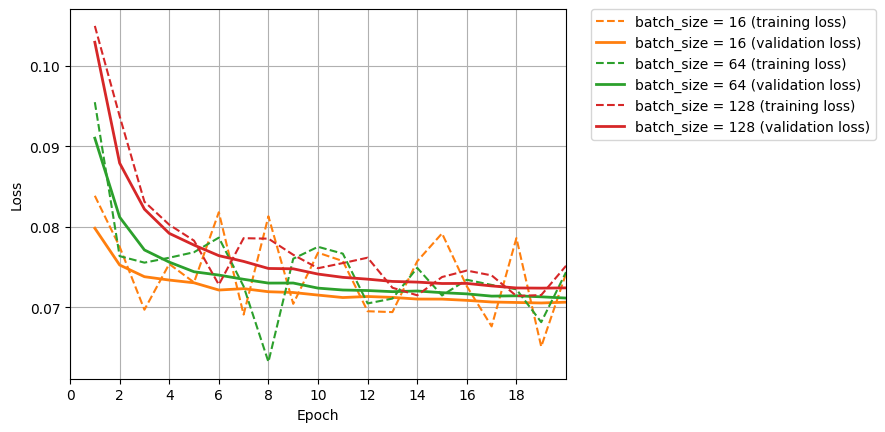

In [ ]:
# plot training and validation losses for experiment 6 models
plot_experiment_history(
    loss_list=experiment_6_losses,
    label_list=[f'batch_size = {experiment_6_train_batch_sizes[0]}',
                f'batch_size = {experiment_6_train_batch_sizes[1]}',
                f'batch_size = {experiment_6_train_batch_sizes[2]}'],
    title='',
    to_plot_train=True
)

# format plot
plt.xlim(1, base_num_epoch)
plt.xticks(range(0, base_num_epoch, 2))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid()
plt.show()

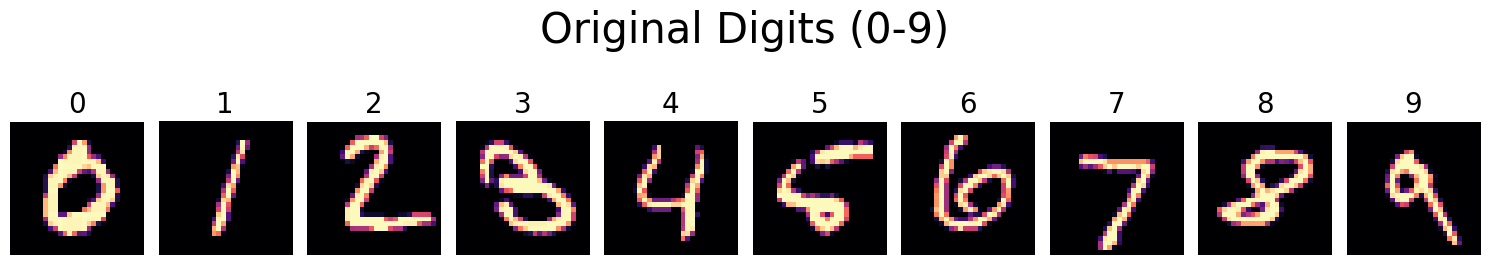

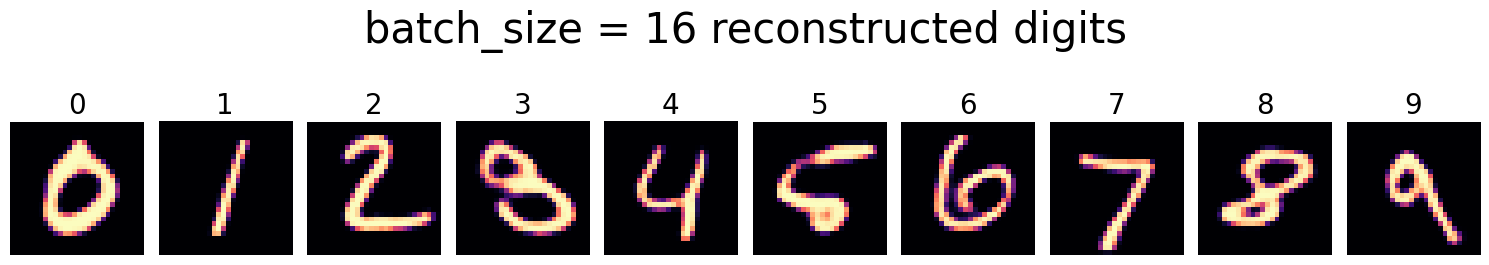

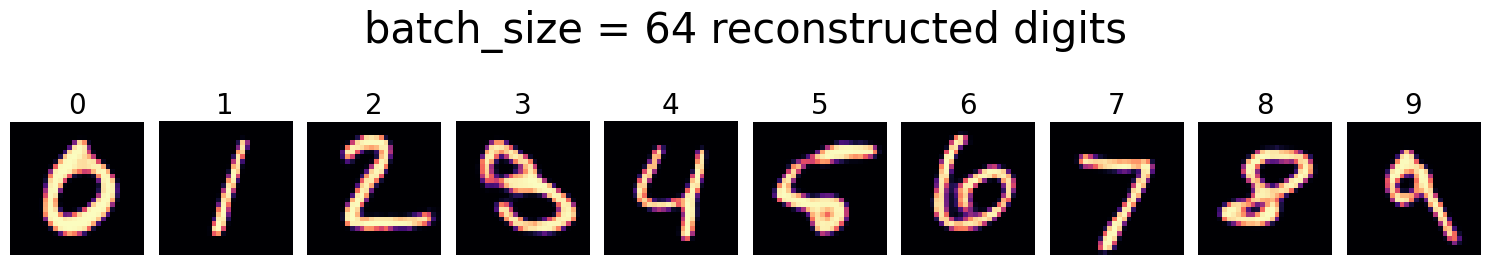

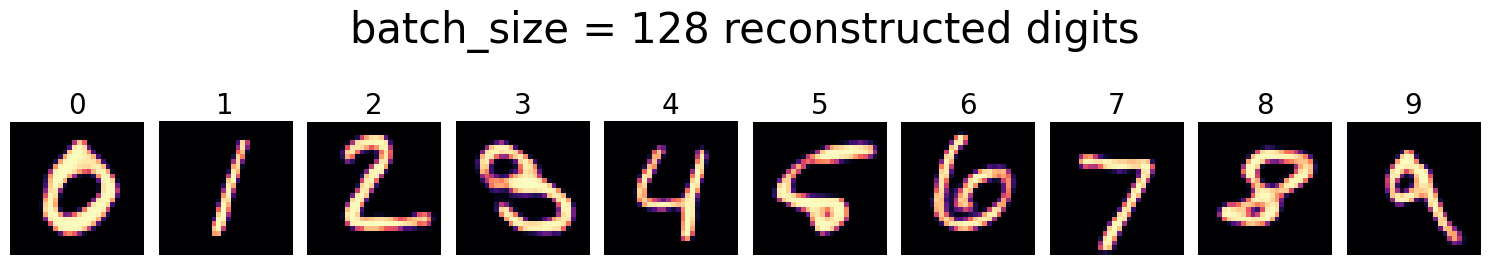

In [ ]:
# display original benchmark images
plot_digits_row(sample_images.squeeze(), sample_labels, title='Original Digits (0-9)')

# display reconstructions from experiment
plot_experiment_reconstructions(
    experiment_6_reconstructions,
    sample_labels,
    title_list=[f'batch_size = {experiment_6_train_batch_sizes[0]}',
                f'batch_size = {experiment_6_train_batch_sizes[1]}',
                f'batch_size = {experiment_6_train_batch_sizes[2]}'],
    )

# Save and Export Experiment 6 Files

In [ ]:
save_experiment_files(
    experiment_name="experiment_6",
    models=experiment_6_models,
    losses=experiment_6_losses,
    reconstructions=experiment_6_reconstructions,
    description_text=experiment_6_description
)

✅ Saved experiment_6 files to: /content/CAE_experiment_6_local


In [ ]:
export_experiment_files(
    experiment_name="experiment_6",
    model_count=len(experiment_6_models)
)

# Import Experiment 6 Files

In [ ]:
# Paths
outputs_path = '/content/CAE-MNIST/outputs/experiment_6_files'

# Storage lists
experiment_6_models = []
experiment_6_losses = []
experiment_6_reconstructions = []

# Loop over the list of experimemt_6_train_batch_sizes in experiment 1
for idx in range(0, len(experiment_6_train_batch_sizes)):

  # Initialize model
  model = AutoEncoder(
      n_channels=base_n_channels,
      latent_dim=base_latent_dim
  ).to(device)

  # Load model weights
  model_file = f'experiment_6_model_{idx+1}.pth'
  model_path = os.path.join(outputs_path, model_file)
  model.load_state_dict(torch.load(model_path, map_location=device))
  model.eval()
  experiment_6_models.append(model)

  # Load loss history
  loss_file = f'experiment_6_loss_{idx+1}.pth'
  loss_path = os.path.join(outputs_path, loss_file)
  loss_history = torch.load(loss_path)
  experiment_6_losses.append(loss_history)

  # Load reconstructed images
  reconstructed_file = f'experiment_6_reconstruction_{idx+1}.pth'
  reconstructed_path = os.path.join(outputs_path, reconstructed_file)
  reconstructed_images = torch.load(reconstructed_path)
  experiment_6_reconstructions.append(reconstructed_images)

# Load experiment description
with open(os.path.join(outputs_path, 'experiment_6_description.txt'), 'r') as f:
    experiment_6_description = f.read()

print("✅ All Experiment 6 models, losses, reconstructed images and description loaded.")

✅ All Experiment 6 models, losses, reconstructed images and description loaded.
